### Solving the Intersection of Two Nonlinear Curves
## Example 1
Find the intersection points of the nonlinear equations:
$$x^2 +y^2=4$$
$$xe^y-1=0$$

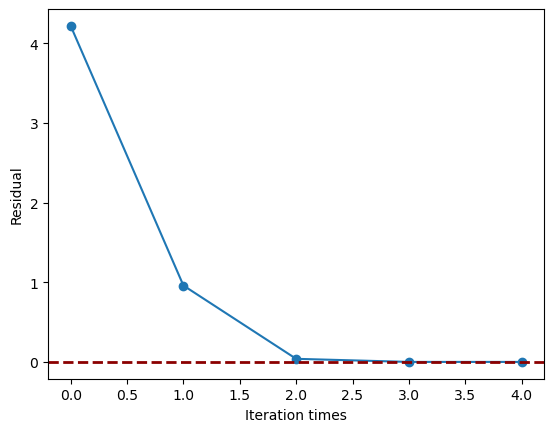

Solution: [0.13596291 1.99537317]
Converged: True, Iterations: 5


In [2]:
import numpy as np
from algorithms.newton_method import NewtonSolver

def func(x):
    return np.array([
        x[0]**2 + x[1]**2 - 4,  # Circle equation
        x[0] * np.exp(x[1]) - 1 # Exponential equation
    ])

def jac(x):
    return np.array([
        [2*x[0], 2*x[1]],        # Derivatives of f1
        [np.exp(x[1]), x[0]*np.exp(x[1])]  # Derivatives of f2
    ])

x0 = np.array([0, 1.0])  # Initial guess
root, info = NewtonSolver(func, x0, jac,plot=True)

print(f"Solution: {root}")
print(f"Converged: {info['converged']}, Iterations: {info['iterations']}")

We can check the plot of two curves to see if the solution is valid

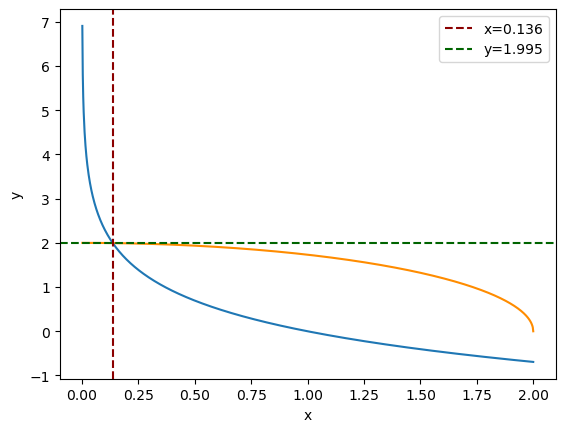

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.linspace(1e-3,2,1000)
ax.plot(x, np.sqrt(4-x**2),c='darkorange')
ax.plot(x, np.log(1/x))
ax.axvline(x=0.13596291,c='darkred',linestyle='--', label='x=0.136')
ax.axhline(y=1.99537317,c='darkgreen',linestyle='--', label='y=1.995')
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.legend()
plt.show()


## Example 2: Spring-Mass System Equilibrium
**System**:
$
\begin{cases}
2x + y - z = 1 \\
x - 3y + 2z = -2 \\
3x + 2y - z = 3
\end{cases}
$

**Task**: Solve for equilibrium point \( (x, y, z) \)


In [3]:
def f2(x):
    return np.array([
        2*x[0] + x[1] - x[2] - 1,
        x[0] - 3*x[1] + 2*x[2] + 2,
        3*x[0] + 2*x[1] - x[2] - 3
    ])

def jac3(x):
    return np.array([
        [2, 1, -1],
        [1, -3, 2],
        [3, 2, -1]
    ])

x0 = [0.0, 0.0, 0.0]
root, info = NewtonSolver(f2, x0, jac3)
print(f"Solution: {np.round(root, 4)}")  # Expected: [1. 1. 2.]

Solution: [0.3333 1.6667 1.3333]


## Example 3: Function Minimization
**Function**: $ f(x,y) = (x-2)^4 + (x-2y)^2 $

**Task**: Find critical points by solving \( \nabla f = 0 \)

**System**:
$
\begin{cases}
4(x-2)^3 + 2(x-2y) = 0 \\
-4(x-2y) = 0
\end{cases}
$

In [4]:
def f3(x):
    return np.array([
        4*(x[0]-2)**3 + 2*(x[0]-2*x[1]),
        -4*(x[0]-2*x[1])
    ])

def jac4(x):
    return np.array([
        [12*(x[0]-2)**2 + 2, -4],
        [-4, 8]
    ])

x0 = [1.5, 0.8]
root, info = NewtonSolver(f3, x0, jac4, maxiter=100)
print(f"Critical point: ({root[0]:.4f}, {root[1]:.4f})")  # Expected: (2.0, 1.0)

Critical point: (1.9989, 0.9994)


## Example 4: Nonlinear Circuit Analysis
**System**:
$
\begin{cases}
e^x + \sin(y) = 3 \\
\cos(x) + y^3 = 2
\end{cases}
$

**Features**: Transcendental equations with multiple solutions

In [5]:
def f4(x):
    return np.array([
        np.exp(x[0]) + np.sin(x[1]) - 3,
        np.cos(x[0]) + x[1]**3 - 2
    ])

def jac5(x):
    return np.array([
        [np.exp(x[0]), np.cos(x[1])],
        [-np.sin(x[0]), 3*x[1]**2]
    ])

x0 = [1.0, 1.0]
root, info = NewtonSolver(f4, x0, jac5, tol=1e-12)
print(f"Solution: x={root[0]:.6f}, y={root[1]:.6f}")
# Expected: x≈1.044595, y≈1.177194

Solution: x=0.749950, y=1.082442


## Example 5: Nonlinear Spring System Equilibrium
**Problem**: Find equilibrium position of a mass connected to two nonlinear springs  
**System Configuration**:  
- Mass $ m = 10 \, \mathrm{kg} $ at position $ (x, y) $
- Spring 1: Nonlinear ($ F = k_1ΔL^2 $) from (0, 0) to mass  
- Spring 2: Linear ($ F = k_2ΔL $) from (4, 0) to mass  

**Equations**:
$
\begin{cases}
k_1ΔL_1^2\frac{x}{L_1} + k_2ΔL_2\frac{x-4}{L_2} = 0 \\
k_1ΔL_1^2\frac{y}{L_1} + k_2ΔL_2\frac{y}{L_2} - mg = 0
\end{cases}
$


where:  


$ ΔL_1 = L_1 - 2 $, $ L_1 = \sqrt{x^2 + y^2} $


$ΔL_2 = L_2 - 3 $, $ L_2 = \sqrt{(x-4)^2 + y^2} $


$ k_1 = 500 \, \mathrm{N/m^2}, \, k_2 = 800 \, \mathrm{N/m} $


In [15]:
def f5(x):
    x_pos, y_pos = x
    L1 = np.hypot(x_pos, y_pos)
    dL1 = L1 - 2
    L2 = np.hypot(x_pos-4, y_pos)
    dL2 = L2 - 3
    
    return np.array([
        500 * dL1**2 * x_pos/L1 + 800 * dL2 * (x_pos-4)/L2,
        500 * dL1**2 * y_pos/L1 + 800 * dL2 * y_pos/L2 - 10*9.81
    ])

def jac5(x):
    x_pos, y_pos = x
    L1 = np.hypot(x_pos, y_pos)
    dL1 = L1 - 2
    L2 = np.hypot(x_pos-4, y_pos)
    dL2 = L2 - 3
    
    # Partial derivatives calculation
    J11 = 500*(2*dL1*(x_pos**2)/L1**2 + dL1**2*(y_pos**2)/L1**3) + \
          800*((x_pos-4)**2/(L2**3) + (L2-3)/L2 - (x_pos-4)**2*(L2-3)/L2**3)
    
    J12 = 500*(2*dL1*(x_pos*y_pos)/L1**2 - dL1**2*(x_pos*y_pos)/L1**3) + \
          800*(y_pos*(x_pos-4)/L2**3 - y_pos*(L2-3)*(x_pos-4)/L2**3)
    
    J21 = 500*(2*dL1*(x_pos*y_pos)/L1**2 - dL1**2*(x_pos*y_pos)/L1**3) + \
          800*(y_pos*(x_pos-4)/L2**3 - y_pos*(L2-3)*(x_pos-4)/L2**3)
    
    J22 = 500*(2*dL1*(y_pos**2)/L1**2 + dL1**2*(x_pos**2)/L1**3) + \
          800*((y_pos**2)/(L2**3) + (L2-3)/L2 - (y_pos**2)*(L2-3)/L2**3)

    return np.array([[J11, J12], [J21, J22]])

# Solve with different initial guesses
solutions = []
for x0 in [[3, 1], [1, -1]]:  # Two different initial guesses
    root, info = NewtonSolver(f5, x0, jac5, tol=1e-6, maxiter=100)
    solutions.append(root)

print(f"Equilibrium positions:\n1. {solutions[0]}\n2. {solutions[1]}")

Equilibrium positions:
1. [1.30142609 2.51619426]
2. [1.30608742 2.52628833]
